Group Members- Rashik Iram Chowdhury, Mutasim Farhan, Zarin Tasnim Roshni 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

**Loading Dataset**

In [2]:
X = np.load('G:\\Assignment\\Assignment-6\\kmeans2d.npy')
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


**K-means Algorithm**

In [3]:
import numpy as np

def kmeans(data, k, max_iterations=100, num_inits=100):

    best_centroids = None
    best_labels = None
    min_cost = np.inf

    for _ in range(num_inits):
        centroids = data[np.random.choice(data.shape[0], k, replace=False), :]

        for _ in range(max_iterations):
            distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.zeros_like(centroids) 
            for i in range(k):
                if np.any(labels == i):
                    new_centroids[i] = data[labels == i].mean(axis=0)
                else:
                    new_centroids[i] = data[np.random.choice(data.shape[0])] 
                    
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        cost = np.sum(np.square(distances[np.arange(data.shape[0]), labels]))

        if cost < min_cost:
            min_cost = cost
            best_centroids = centroids
            best_labels = labels

    return best_centroids, best_labels, min_cost

**Applying K-means**

In [4]:
k = 3
cluster_centers, labels, min_cost = kmeans(X, k)
print('cluster_center', cluster_centers.shape)
print('labels', labels.shape)

cluster_center (3, 2)
labels (300,)


**Clusters plot**

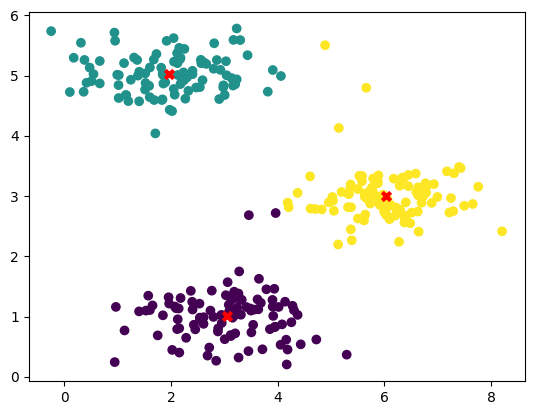

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='r', linewidths=3)

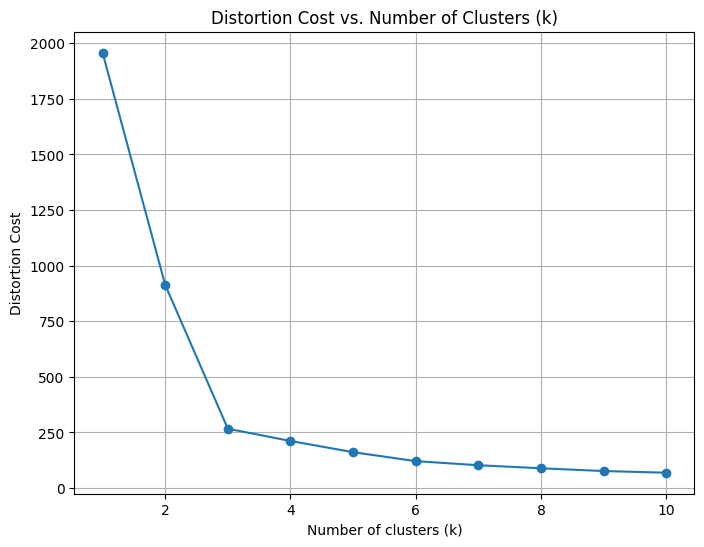

In [7]:
import matplotlib.pyplot as plt

k = range(1, 11)  
costs = []

for i in k:
    _, _, cost = kmeans(X, i)
    costs.append(cost)


plt.figure(figsize=(8, 6))
plt.plot(k, costs, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion Cost')
plt.title('Distortion Cost vs. Number of Clusters (k)')
plt.grid(True)
plt.show()


**Image compression using K-means**

Shape of original_image is:  (128, 128, 3)


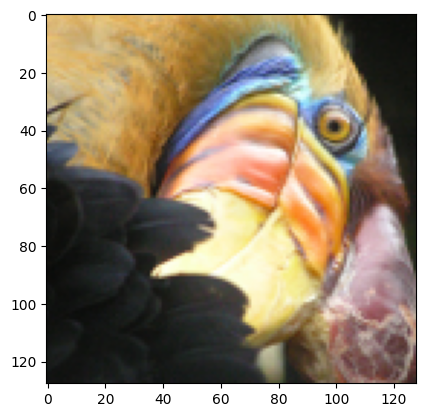

In [9]:
original_img = plt.imread('G:\\Assignment\\Assignment-6\\bird_small.png')
plt.imshow(original_img)
print("Shape of original_image is: ", original_img.shape)

In [10]:
original_img = original_img / 255

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img.shape

(16384, 3)

In [14]:
K = 4
cluster_centers, labels, min_cost = kmeans(X_img, K)

In [15]:
X_recovered = cluster_centers[labels].reshape(original_img.shape)

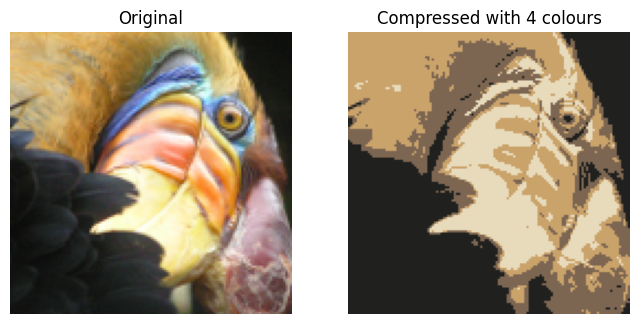

In [16]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [17]:
K = 8
cluster_centers, labels, min_cost = kmeans(X_img, K)

In [18]:
X_recovered = cluster_centers[labels].reshape(original_img.shape)

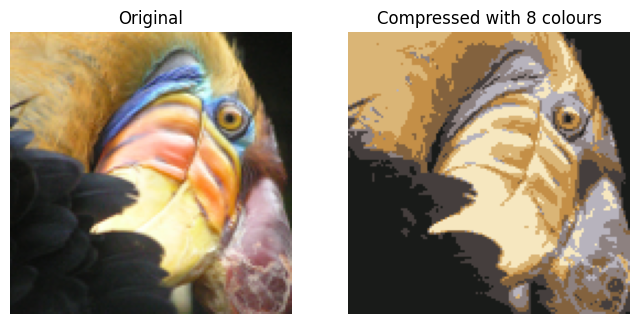

In [19]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [20]:
K = 16
cluster_centers, labels, min_cost = kmeans(X_img, K)

In [21]:
X_recovered = cluster_centers[labels].reshape(original_img.shape)

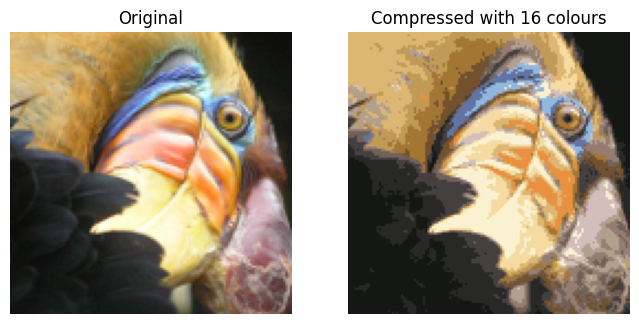

In [22]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [23]:
K = 32
cluster_centers, labels, min_cost = kmeans(X_img, K)

In [24]:
X_recovered = cluster_centers[labels].reshape(original_img.shape)

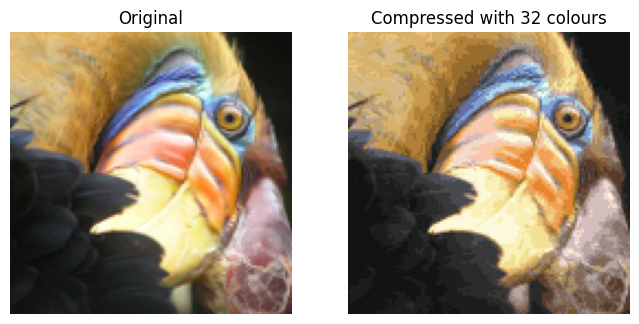

In [25]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()